<a href="https://colab.research.google.com/github/Tariqul057/ML-475/blob/Lab-Works/Copy_of_Lab_Work_1_(475).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classify Mushroom Using Decision Tree and Random Forest.

Dataset: https://archive.ics.uci.edu/dataset/73/mushroom

Submit:


1.   Submit your github link.
2.   Perform Exploratory Data Analysis (EDA) on the dataset.
3.   Evaluate and compare Random Forest tree accuracy for the folowing n_estimators values 1,50,100,150,200, and 250.
4.   Evaluate and compare performance of Random Forest and Decision Tree.
5.   Submit a report of EDA and results of tasks 3 and 4.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [ ]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
y

,poisonous
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


Decision Tree

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

(150, 5)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)   poisonous  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
poisonous
0    50
1    50
2    50
Name: count, dtype: int64


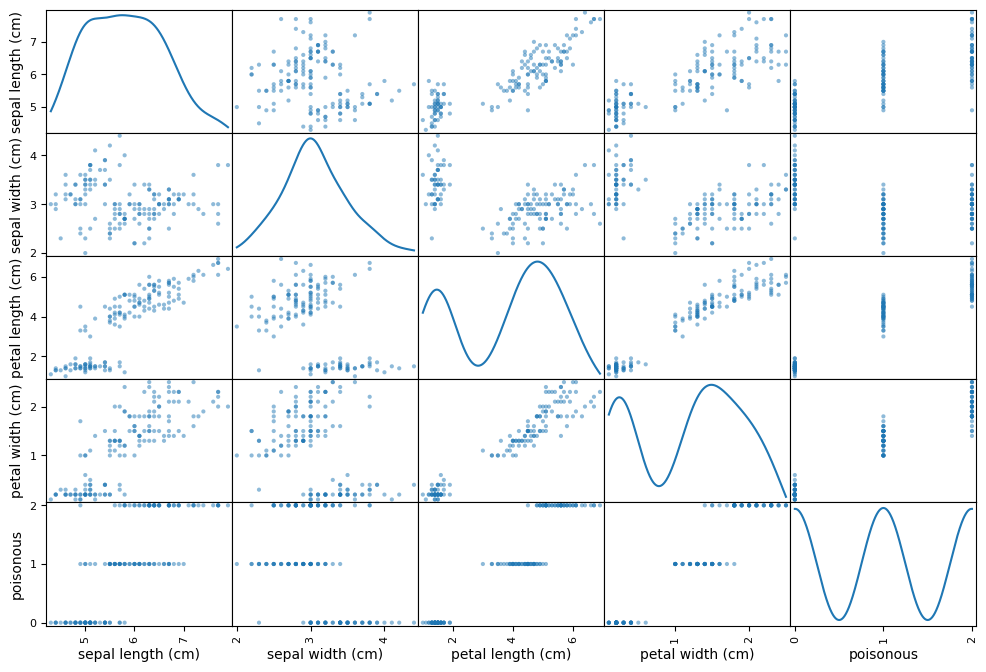

In [ ]:
# Convert the data to a pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add the target column
df['poisonous'] = iris.target
# Check the shape and summary of the data
print(df.shape)
print(df.describe())
# Check the distribution of the target classes
print(df['poisonous'].value_counts())
# Plot the pairwise scatter plot of the features
pd.plotting.scatter_matrix(df, figsize=(12, 8), diagonal='kde')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# load the Mushroom dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

df = pd.read_csv(url, header=None, names=column_names)

# Encode categorical variables using LabelEncoder
labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create a decision tree classifier with gini criterion and maximum depth of 3
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [ ]:
# Fit the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       843
           1       0.93      0.98      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



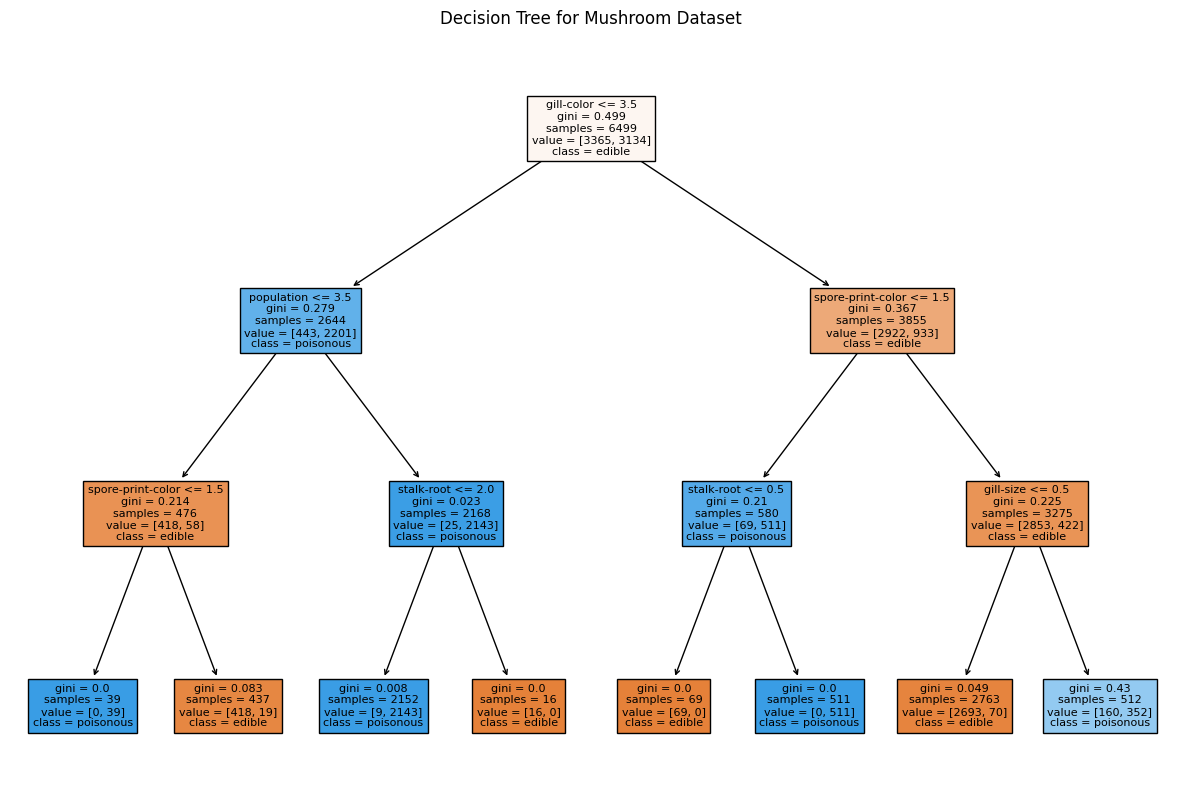

In [ ]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True)
plt.title('Decision Tree for Mushroom Dataset')
plt.show()


Random Forest

In [ ]:
pip install pandas scikit-learn matplotlib


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the mushroom dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

df = pd.read_csv(url, header=None, names=columns)

# Replace missing values represented by '?' with NaN
df = df.replace('?', pd.NA)
# Drop rows with missing values
df = df.dropna()

In [ ]:
# Convert categorical features to numerical
df = pd.get_dummies(df, columns=df.columns)

In [ ]:
# Split the data into features and target
X = df.drop('class_e', axis=1)  # 'class_e' is the edible class
y = df['class_e']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       424
        True       1.00      1.00      1.00       705

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



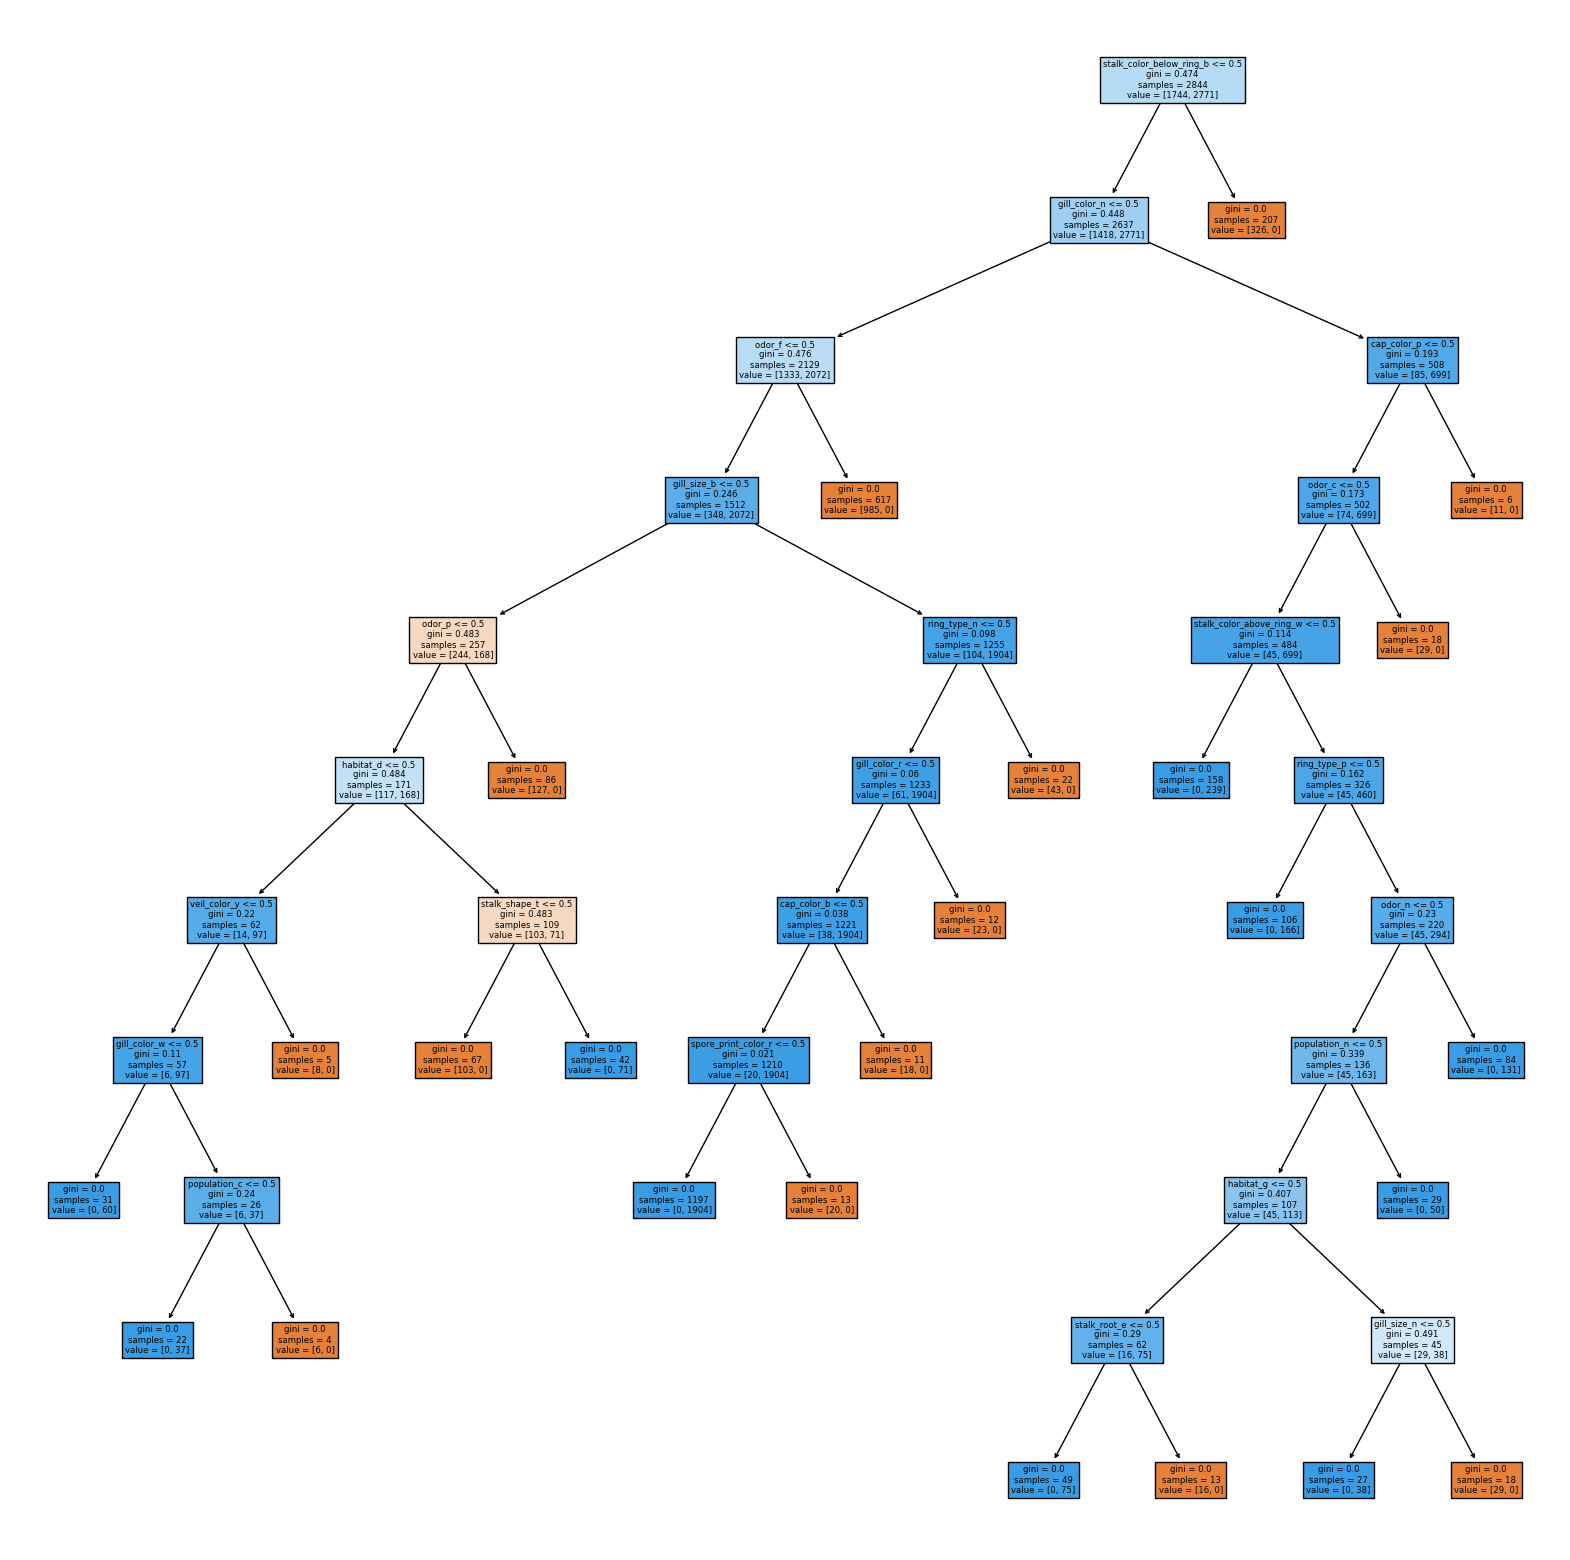

In [ ]:
# Plot one of the decision trees from the Random Forest
plt.figure(figsize=(20, 20))
_ = plot_tree(clf.estimators_[0], feature_names=X.columns, filled=True)
plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the mushroom dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

df = pd.read_csv(url, header=None, names=columns)

# Preprocessing
df = df.replace('?', pd.NA)
df = df.dropna()
df = pd.get_dummies(df, columns=df.columns)
X = df.drop('class_e', axis=1)
# 'class_e' is the edible class
y = df['class_e']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# List of n_estimators values
n_estimators_values = [1, 50, 100, 150, 200, 250]

# Dictionary to store the accuracy for each n_estimators value
accuracy_dict = {}

# Evaluate Random Forest with different n_estimators
for n in n_estimators_values:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_clf.fit(X_train, y_train)
    y_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[n] = accuracy

# Print the results
print("Random Forest Accuracy for different n_estimators values:")
for n, accuracy in accuracy_dict.items():
    print(f"n_estimators = {n}: Accuracy = {accuracy:.4f}")


Random Forest Accuracy for different n_estimators values:
n_estimators = 1: Accuracy = 1.0000
n_estimators = 50: Accuracy = 1.0000
n_estimators = 100: Accuracy = 1.0000
n_estimators = 150: Accuracy = 1.0000
n_estimators = 200: Accuracy = 1.0000
n_estimators = 250: Accuracy = 1.0000
